<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Unsupervised_association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Apply one-hot encoding on our dataset
te_ary = te.fit(dataset).transform(dataset)

# Creating a new DataFrame from our NumPy array
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the one-hot encoded DataFrame
df.head()


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


 # (Support) Finding Frequent Itemsets


In [ ]:
# Lets identify the itemsets that appear in at least 60% of our trasactions
from mlxtend.frequent_patterns import apriori

apriori(df, min_support =0.6)




,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


# (Confidence) Generating Association Rules





In [ ]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,1.0,0.00,inf,0.0,0.80,0.000,0.900
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,1.0,0.00,1.0,0.0,0.80,0.000,0.900
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.5,0.75,1.000,0.875
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.0,0.75,0.375,0.875
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.5,0.75,1.000,0.875
8,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.0,0.75,0.375,0.875


# Lift

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,1.0,0.12,inf,0.5,0.75,1.0,0.875
1,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,1.0,0.12,inf,0.5,0.75,1.0,0.875
2,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,1.0,0.12,inf,0.5,0.75,1.0,0.875


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe
data = {
    'antecedents': ['(Eggs)', '(Kidney Beans)', '(Eggs)', '(Onion)', '(Milk)', '(Onion)', '(Yogurt)', '(Eggs, Onion)', '(Eggs, Kidney Beans)', '(Kidney Beans, Onion)', '(Eggs)', '(Onion)'],
    'consequents': ['(Kidney Beans)', '(Eggs)', '(Onion)', '(Eggs)', '(Kidney Beans)', '(Kidney Beans)', '(Kidney Beans)', '(Kidney Beans)', '(Onion)', '(Eggs)', '(Kidney Beans, Onion)', '(Eggs, Kidney Beans)'],
    'support': [0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'confidence': [1.00, 0.80, 0.75, 1.00, 1.00, 1.00, 1.00, 1.00, 0.75, 1.00, 0.75, 1.00],
    'lift': [1.00, 1.00, 1.25, 1.25, 1.00, 1.00, 1.00, 1.00, 1.25, 1.25, 1.25, 1.25]
}

df = pd.DataFrame(data)
df.head()

,antecedents,consequents,support,confidence,lift
0,(Eggs),(Kidney Beans),0.8,1.00,1.00
1,(Kidney Beans),(Eggs),0.8,0.80,1.00
2,(Eggs),(Onion),0.6,0.75,1.25
3,(Onion),(Eggs),0.6,1.00,1.25
4,(Milk),(Kidney Beans),0.6,1.00,1.00


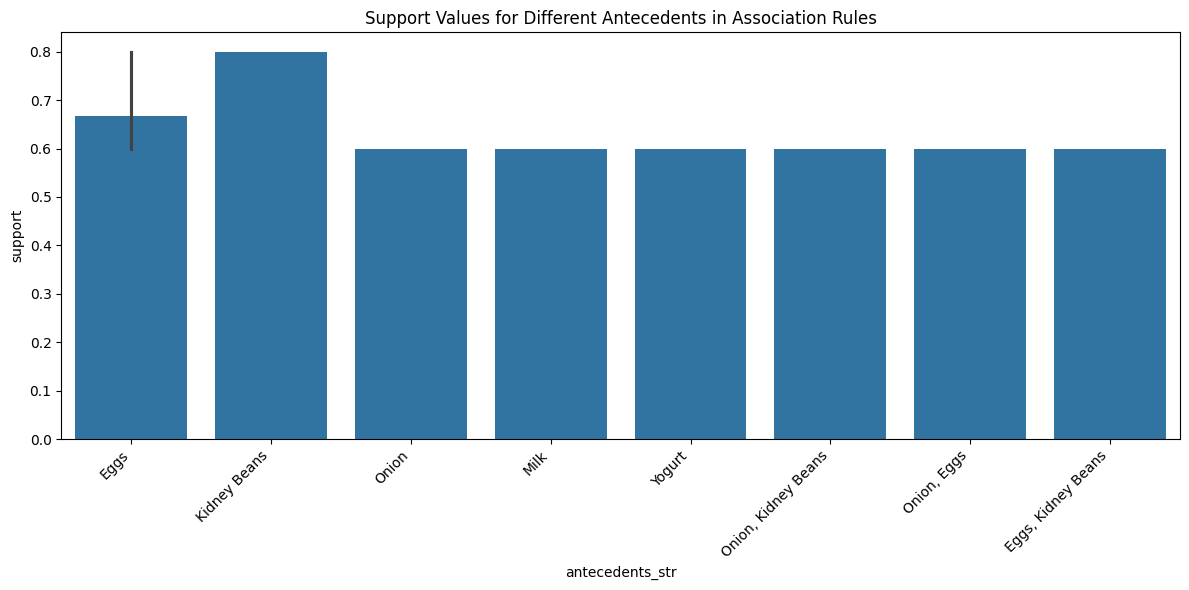

In [ ]:
# 1. Bar plot of support values
plt.figure(figsize=(12, 6))
sns.barplot(x='antecedents', y='support', data=df)
plt.title('Support Values for Different Antecedents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


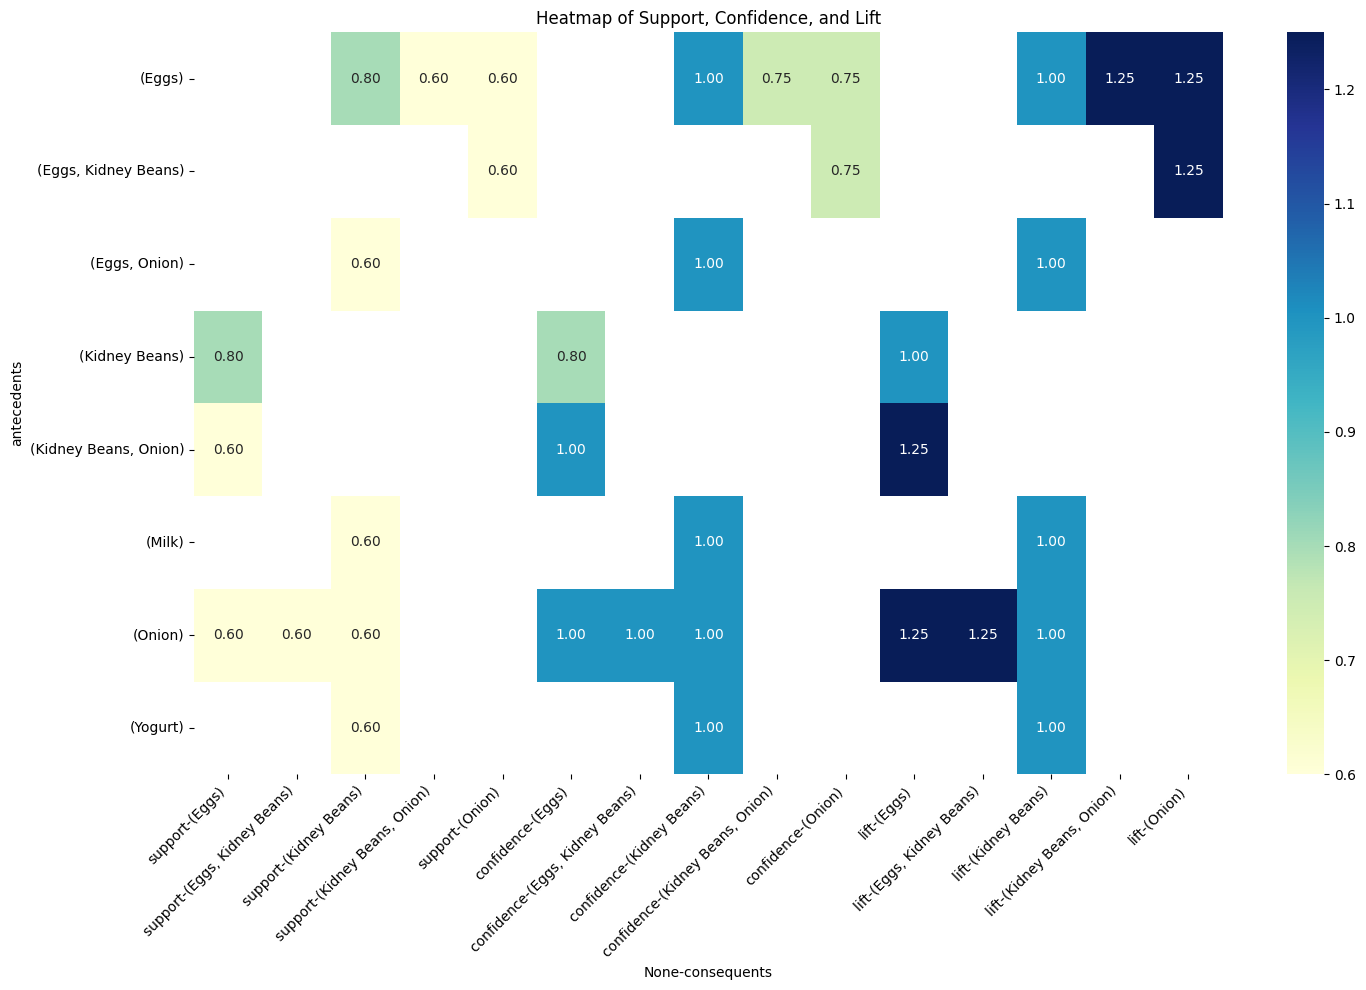

In [ ]:
# 3. Heatmap of support, confidence, and lift
pivot_df = df.pivot(index='antecedents', columns='consequents', values=['support', 'confidence', 'lift'])
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Support, Confidence, and Lift')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()